# Image compression by SVD and Eigenfaces

## 1 # Image compression by SVD 

Idea: 
(1) We take an image

(2) we convert it in gray scale if necessary

(3) We construct the matrix of pixels, let it be A

(4) We compute the SVD of the matrix, of rank r

(5) We choose k<=r

(6) We construct the Low Rank (k) approximation  of A: A_k

(7) We reconstruct the image

Let's Begin the game

In [2]:
import os
import numpy as np
from PIL import Image
# pip install pillow
import matplotlib.pyplot as plt
%matplotlib inline

Size of the image:  (158, 158)  Total:  262144


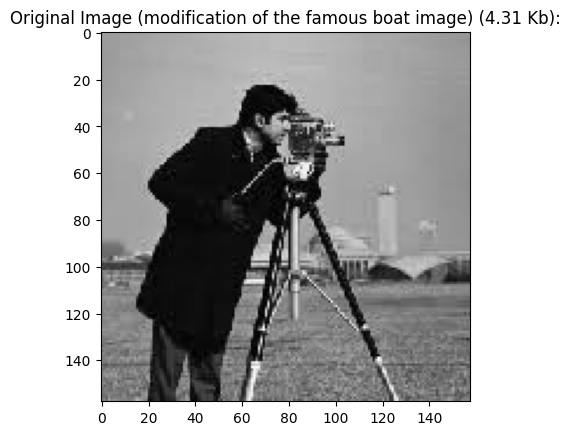

In [3]:
# impath =path to the image file 
impath = 'images.jpeg' 

# Let us open the image
img = Image.open(impath)
s = float(os.path.getsize(impath))/1000 #Normalization 
print("Size of the image: ",img.size, " Total: ", 512*512)
plt.title("Original Image (modification of the famous boat image) (%0.2f Kb):" %s)
plt.imshow(img)

(24964,)
(158, 158)
158


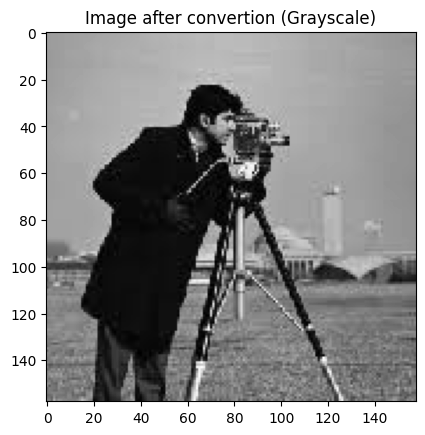

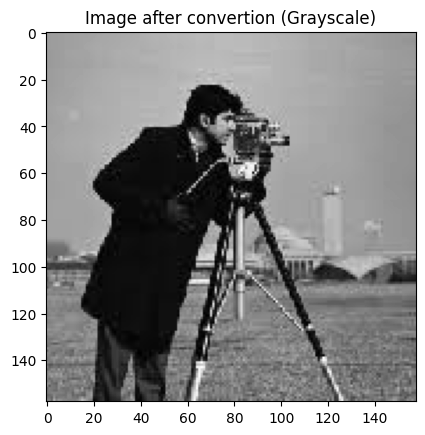

In [4]:
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
print(imgmat.shape)
imgmat.shape = (imggray.size[1], imggray.size[0])
print(imgmat.shape)
print(np.linalg.matrix_rank(imgmat))
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after convertion (Grayscale)")
plt.show()
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after convertion (Grayscale)")
plt.show()
#result = Image.fromarray((cmpimg ).astype(np.uint8))
#result.save('myboat_grey.jpg')

In [5]:
# Let us compute the SVD of the image
U,S,Vt=np.linalg.svd(imgmat, full_matrices=True) 
#Singular Value Decomposition

In [6]:
# Let us compute the SVD of the image
U1,S1,V1t=np.linalg.svd(imgmat, full_matrices=False) #single value decomposition

In [7]:
print(U-U1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Image after compression: 
1
(158, 158)


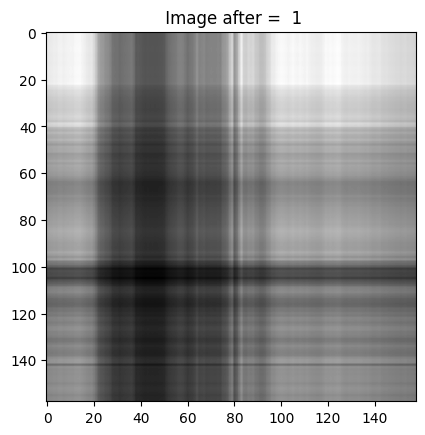

6
(158, 158)


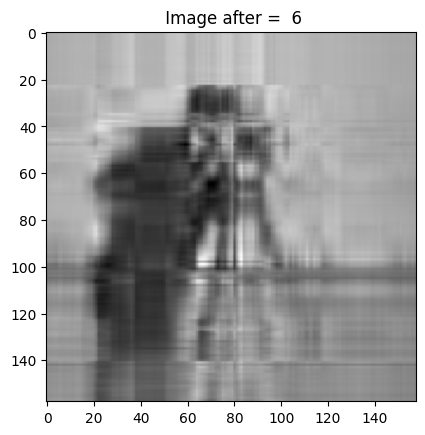

11
(158, 158)


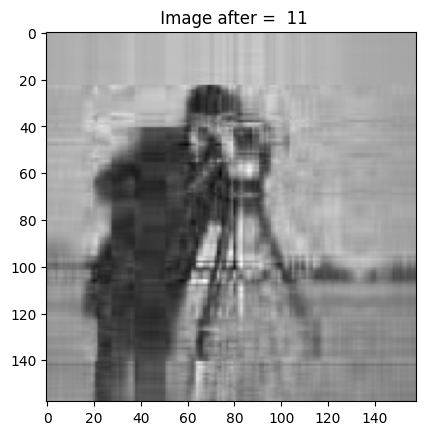

16
(158, 158)


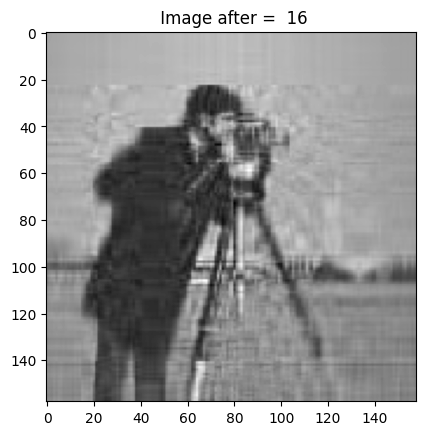

21
(158, 158)


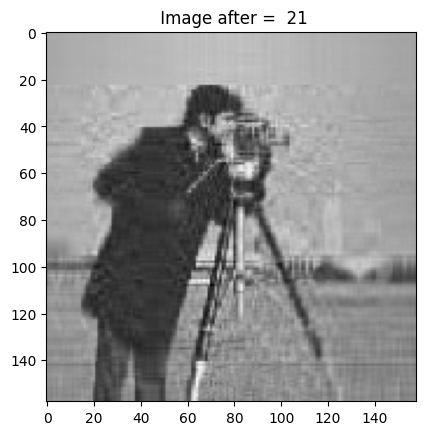

26
(158, 158)


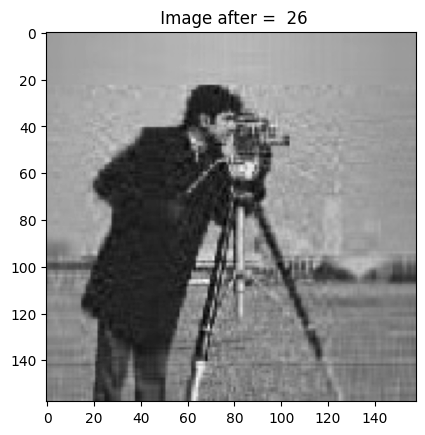

31
(158, 158)


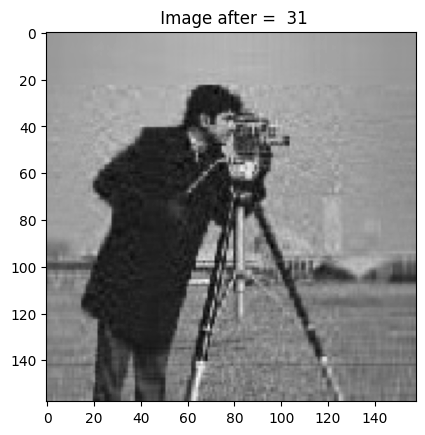

36
(158, 158)


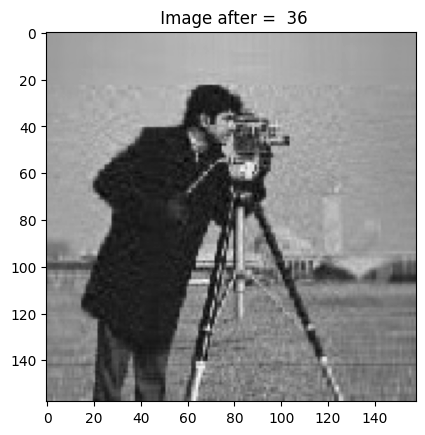

41
(158, 158)


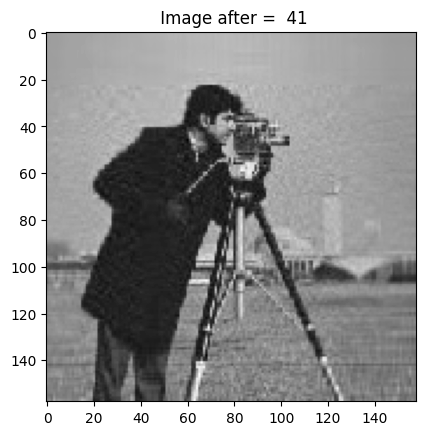

46
(158, 158)


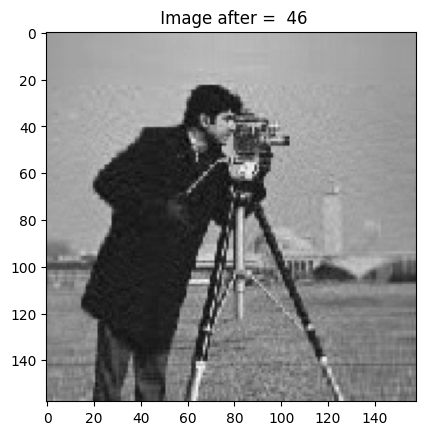

51
(158, 158)


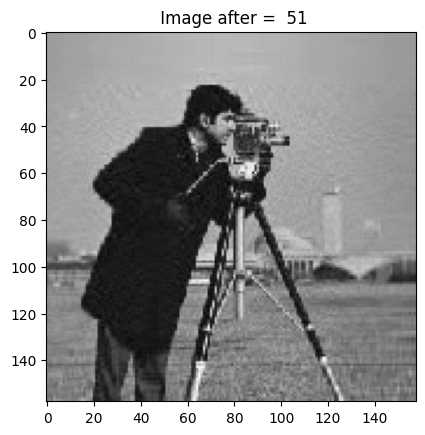

56
(158, 158)


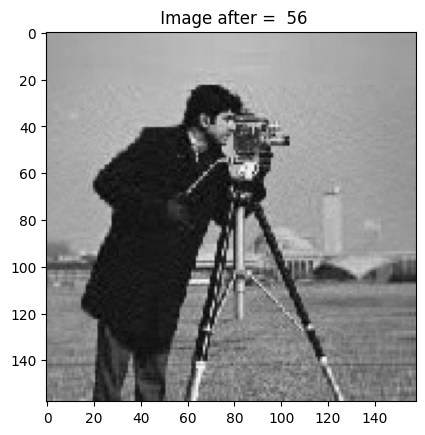

61
(158, 158)


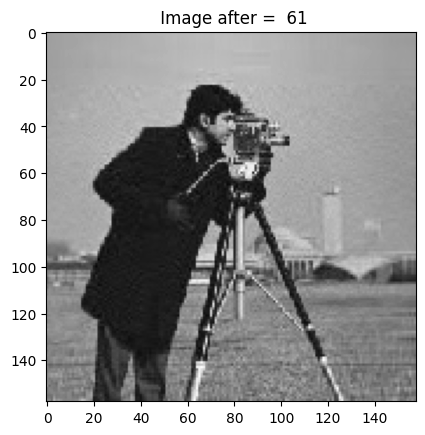

66
(158, 158)


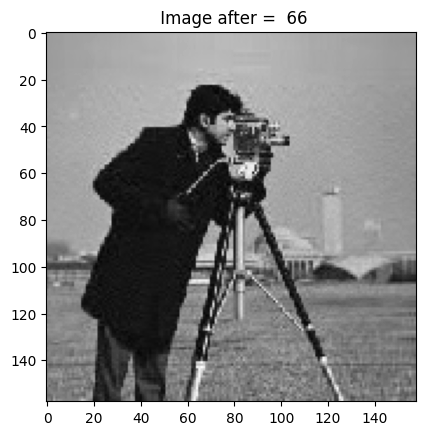

71
(158, 158)


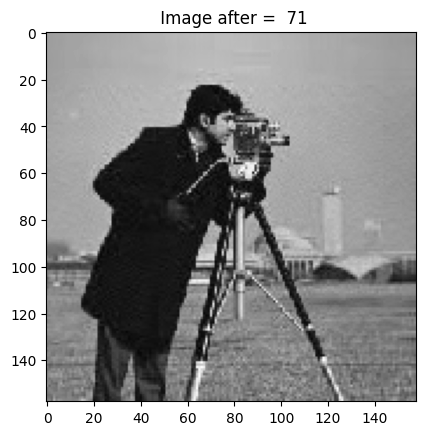

76
(158, 158)


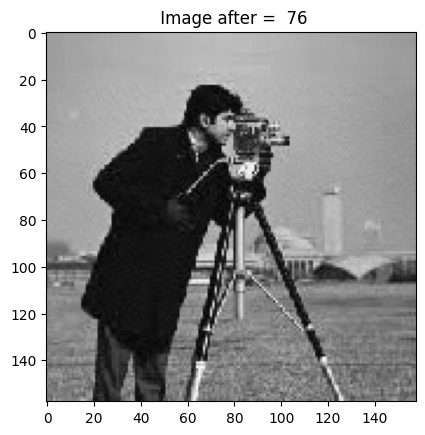

81
(158, 158)


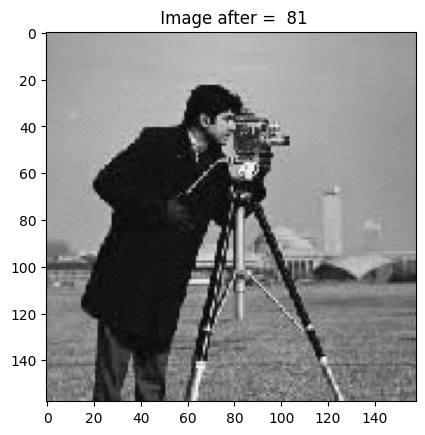

86
(158, 158)


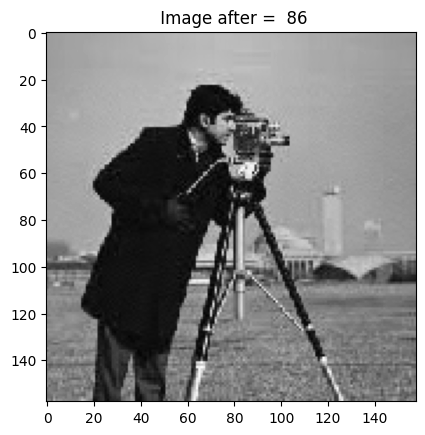

91
(158, 158)


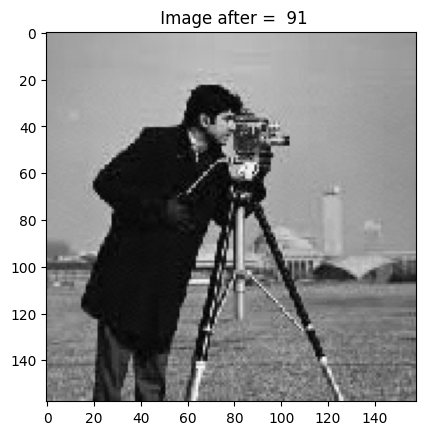

96
(158, 158)


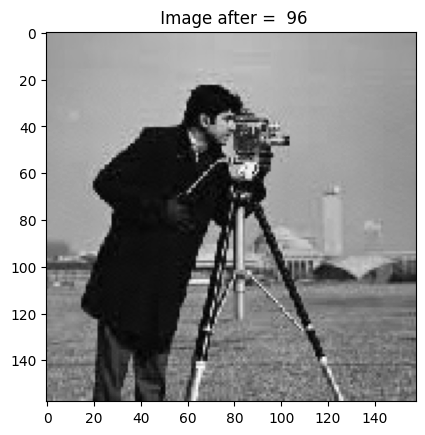

5.159
CPU times: total: 9.7 s
Wall time: 10.2 s


In [8]:
%%time
print("Image after compression: ")

for k in range(1, 100, 5):
    cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
    print(np.linalg.matrix_rank(cmpimg))
    print(cmpimg.shape)
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Image after =  %s" %k
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))
result.save('myboatcompressed.jpg')
s = float(os.path.getsize('myboatcompressed.jpg'))/1000
print(s)

In [9]:
np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(Vt[:1,:])

matrix([[188.80595047, 189.59275239, 190.49408813, ..., 177.20130512,
         176.47901043, 175.48640437],
        [188.68040601, 189.46668476, 190.36742117, ..., 177.08347705,
         176.36166264, 175.3697166 ],
        [188.5438077 , 189.32951721, 190.22960151, ..., 176.95527452,
         176.23398269, 175.24275478],
        ...,
        [122.03278814, 122.54132949, 123.12389859, ..., 114.53224473,
         114.06539698, 113.42383624],
        [125.12342013, 125.64484092, 126.24216431, ..., 117.43291614,
         116.95424488, 116.29643582],
        [125.92562761, 126.4503914 , 127.05154443, ..., 118.18581727,
         117.70407709, 117.0420506 ]])

Image after compression: 


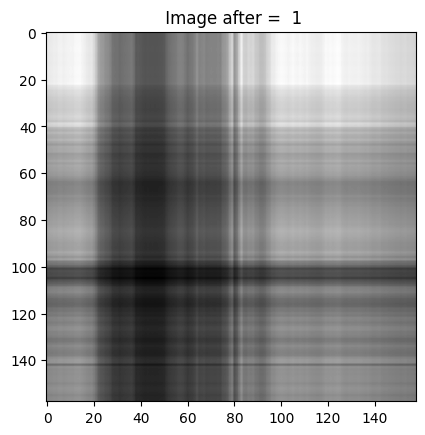

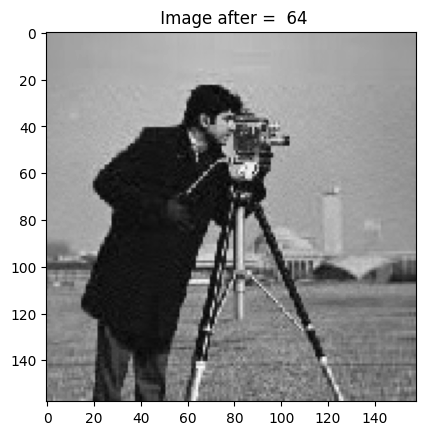

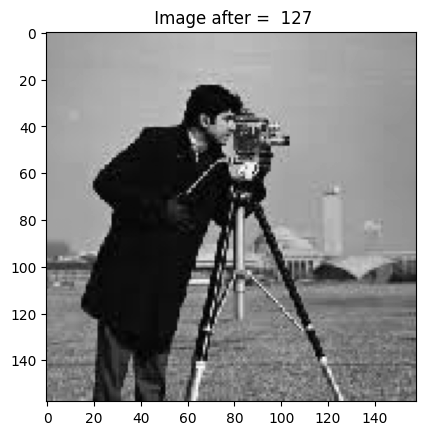

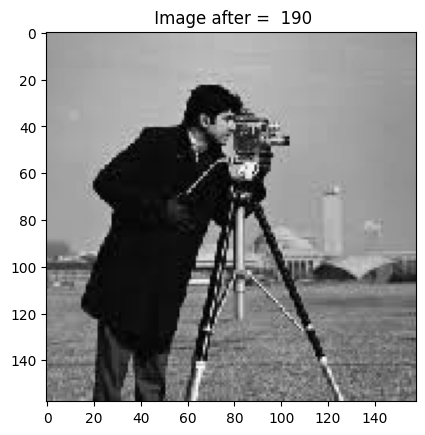

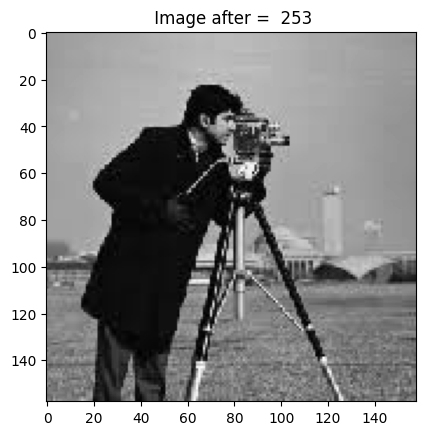

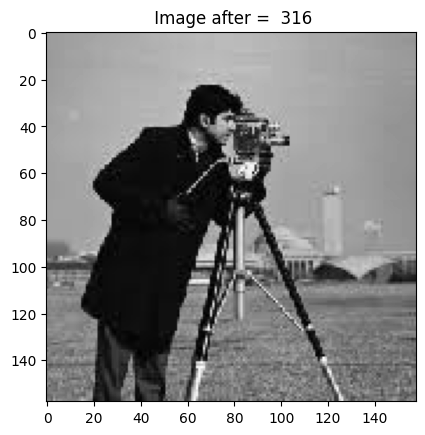

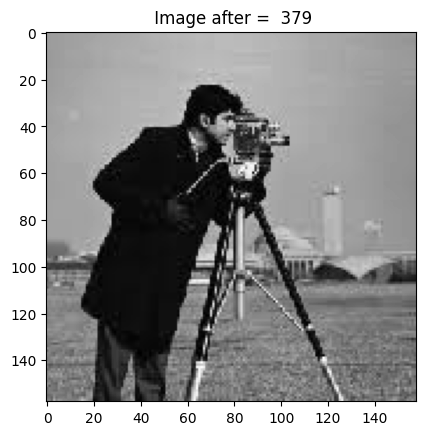

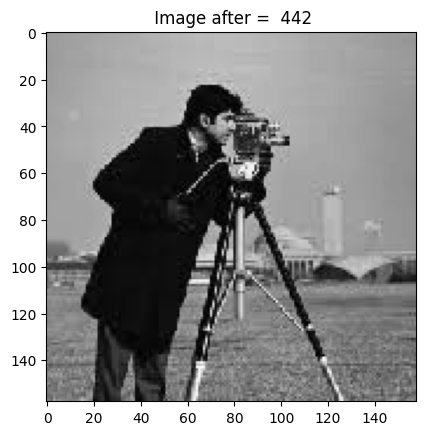

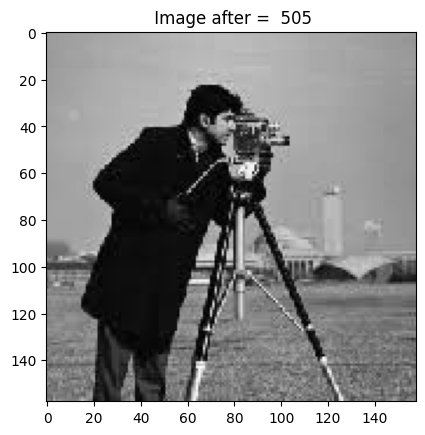

CPU times: total: 4.28 s
Wall time: 4.46 s


In [10]:
%%time
print("Image after compression: ")

for i in range(1, 512, 63):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Image after =  %s" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))
result.save('myboatcompressed.jpg')

## 2 # Eigenfaces

##### See https://en.wikipedia.org/wiki/Eigenface 
##### In 1991 M. Turk and A. Pentland expanded these results and presented the eigenface method of face recognition.[3] In addition to designing a system for automated face recognition using eigenfaces, they showed a way of calculating the eigenvectors of a covariance matrix such that computers of the time could perform eigen-decomposition on a large number of face images. Face images usually occupy a high-dimensional space and conventional principal component analysis was intractable on such data sets. Turk and Pentland's paper demonstrated ways to extract the eigenvectors based on matrices sized by the number of images rather than the number of pixels. 

## We will  use the Labeled Faces "in the Wild" dataset made available through Scikit-Learn:

In [14]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


#### This large dataset is large, so we will use RandomizedPCA
#### it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator
#### We will look different values of K: the numbers  "components"

In [15]:
## from sklearn.decomposition import RandomizedPCA  does not work anymore
## Tric to correct: 
from sklearn.decomposition import PCA as RandomizedPCA
K=50
pca = RandomizedPCA(K)
pca.fit(faces.data)

PCA(n_components=50)

In [12]:
## In this case, 
## We can visualize the images 
## "associated" with the first several principal components 
## Remember: these components are technically the  "eigenvectors" (or singular vectors),
## so these types of images are often called "eigenfaces"). 
## See in this figure as they sound:

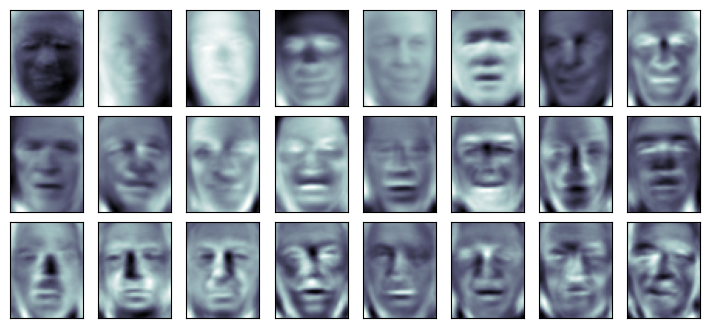

In [25]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

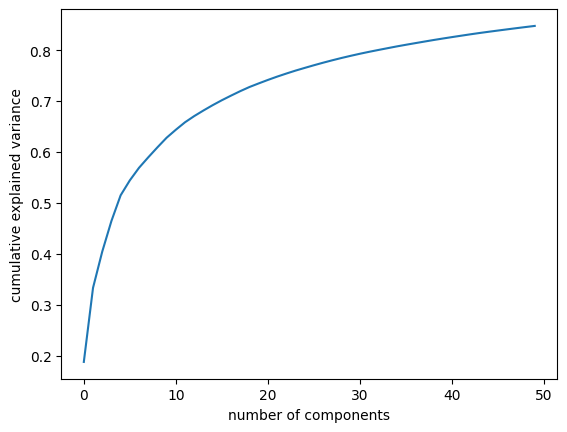

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
# Compute the components and projected faces
K=25
pca = RandomizedPCA(K).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

K= 25


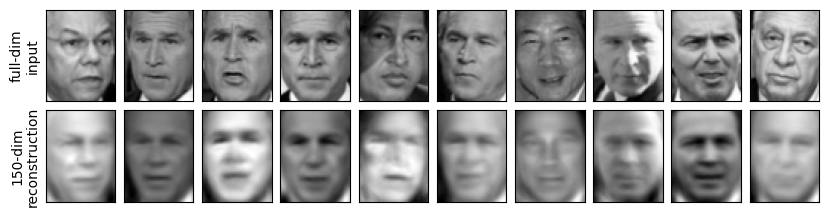

In [19]:
# Plot the results
print("K=",K)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [20]:
# Compute the components and projected faces
K=35
print("K=",K)
pca = RandomizedPCA(K).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

K= 35


K= 35


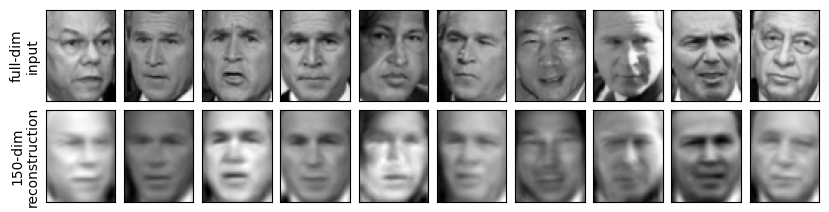

In [21]:
# Plot the results
print("K=",K)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

K= 256
K= 256


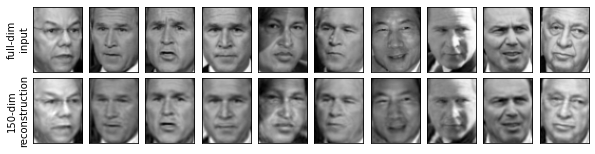

In [ ]:
# Compute the components and projected faces
K=256
print("K=",K)
pca = RandomizedPCA(K).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

####

# Plot the results
print("K=",K)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

K= 500
K= 500


Text(0, 0.5, '150-dim\nreconstruction')

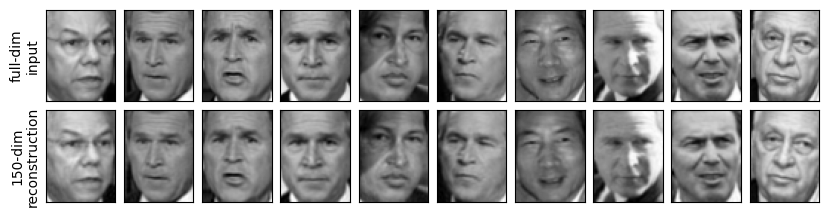

In [24]:
# Compute the components and projected faces
K=500
print("K=",K)
pca = RandomizedPCA(K).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

####

# Plot the results
print("K=",K)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

K= 10
K= 10


Text(0, 0.5, '150-dim\nreconstruction')

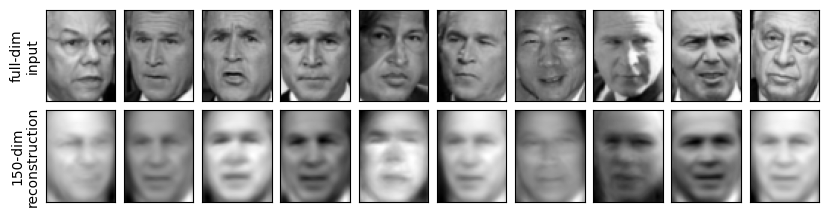

In [26]:
# Compute the components and projected faces
K=10
print("K=",K)
pca = RandomizedPCA(K).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

####

# Plot the results
print("K=",K)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

#### Connection  to the SVD ? 

In [22]:
%%latex
(From Wikipedia) Let $X$ denote the $d × n$  matrix with column $x_i$
as the image vector with mean subtracted. Then, 

<IPython.core.display.Latex object>

In [23]:
%%latex
$$cov(X)=X X^T /n$$
$$X= U S V^T$$
$$ X X^T = U S V^T V S U^T = U S^2 U^T $$

<IPython.core.display.Latex object>

Using SVD on the data matrix X, it is unnecessary to calculate the actual covariance matrix to get eigenfaces. 